In [1]:
import pandas as pd
test = pd.read_csv("../04 - San Francisco/train.csv")
display(test.head())

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [2]:
print(test["Category"].value_counts())

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [3]:
test = test[test["Category"].isin(["LARCENY/THEFT","ASSAULT","DRUG/NARCOTIC","VANDALISM","PROSTITUTION","KIDNAPPING"])]
print(test["Category"].value_counts())

LARCENY/THEFT    174900
ASSAULT           76876
DRUG/NARCOTIC     53971
VANDALISM         44725
PROSTITUTION       7484
KIDNAPPING         2341
Name: Category, dtype: int64


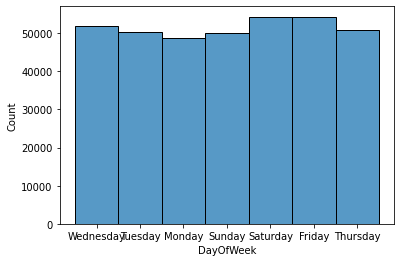

DayOfWeek      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Category                                                                     
ASSAULT         10560    10280      10553     10246   11160     11995   12082
DRUG/NARCOTIC    7823     8474       9267      8454    7420      6390    6143
KIDNAPPING        340      306        292       289     385       355     374
LARCENY/THEFT   23570    23957      24487     24415   27104     27217   24150
PROSTITUTION      409     1421       1479      1547    1158       850     620
VANDALISM        5946     5852       5927      5980    7092      7326    6602


<AxesSubplot:xlabel='DayOfWeek', ylabel='Category'>

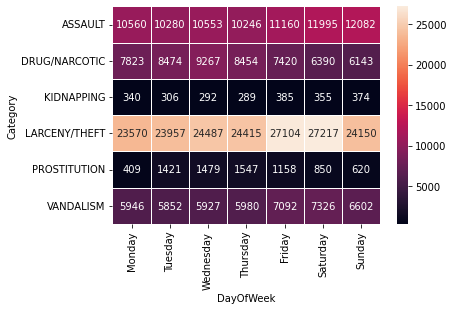

In [4]:
import seaborn as sn
import matplotlib.pyplot as plt
index_dias_semana = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"]
sn.histplot(data=test,x="DayOfWeek")
plt.show()
crimen_por_dia = test.groupby(["Category","DayOfWeek"]).size().unstack().reindex(columns=index_dias_semana)
print(crimen_por_dia)
sn.heatmap(crimen_por_dia, annot=True, fmt="d", linewidths=.5)

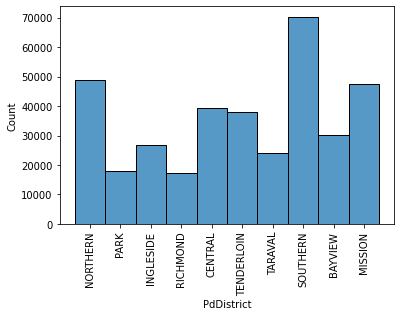

Category    ASSAULT  DRUG/NARCOTIC  KIDNAPPING  LARCENY/THEFT  PROSTITUTION  \
PdDistrict                                                                    
BAYVIEW        9857           4498         313          10119            70   
CENTRAL        6977           1805         197          25060           778   
INGLESIDE      8533           2373         348          10236            26   
MISSION       11149           8757         312          18223          3629   
NORTHERN       8318           4511         231          28630          1831   
PARK           3515           2573          94           9146             5   
RICHMOND       3202            999         104           9893            24   
SOUTHERN      12183           9228         340          41845           135   
TARAVAL        5463           1531         191          11845            82   
TENDERLOIN     7679          17696         211           9903           904   

Category    VANDALISM  
PdDistrict             
BAY

<AxesSubplot:xlabel='Category', ylabel='PdDistrict'>

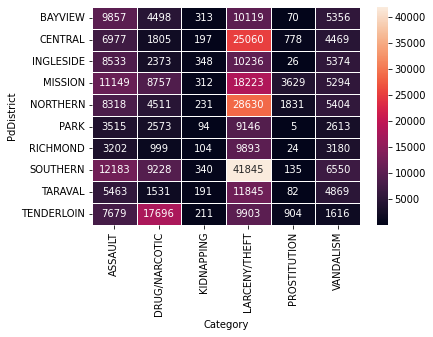

In [5]:
sn.histplot(data=test,x="PdDistrict")
plt.xticks(rotation=90)
plt.show()
crimen_por_distrito = test.groupby(["Category","PdDistrict"]).size().unstack().transpose()
print(crimen_por_distrito)
sn.heatmap(crimen_por_distrito, annot=True, fmt="d", linewidths=.5)

In [6]:
from datetime import datetime

def conversor(x):
    a = datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
    a = a.replace(hour=0,second=0,minute=0)
    return a
date_test = test.copy()
date_test["Dates"] = test["Dates"].apply(conversor)


<AxesSubplot:xlabel='Dates', ylabel='Count'>

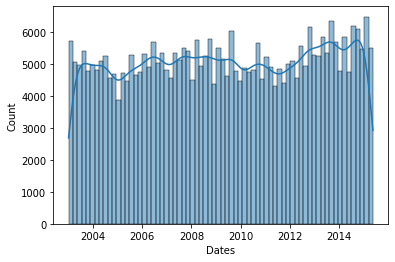

In [7]:
sn.histplot(date_test,x=date_test["Dates"],kde=True)

In [8]:
test_normalizado = test.copy()
def timestamp(x):
    return conversor(x).timestamp()
test_normalizado["Dates"] = test_normalizado["Dates"].apply(timestamp)

In [ ]:
def normalizar(data):
    data["X"] -= data["X"].min()
    data["X"] /= data["X"].max()
    data["Y"] -= data["Y"].min()
    data["Y"] /= data["Y"].max()
    data["Dates"] -= data["Dates"].min()
    data["Dates"] /= data["Dates"].max()

In [9]:
normalizar(test_normalizado)
print(test_normalizado.head())

   Dates       Category                        Descript  DayOfWeek PdDistrict  \
3    1.0  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4    1.0  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
5    1.0  LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO  Wednesday  INGLESIDE   
8    1.0  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO  Wednesday   RICHMOND   
9    1.0  LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO  Wednesday    CENTRAL   

  Resolution                        Address         X         Y  
3       NONE       1500 Block of LOMBARD ST  0.043030  0.001778  
4       NONE      100 Block of BRODERICK ST  0.037198  0.001217  
5       NONE            0 Block of TEDDY AV  0.054821  0.000105  
8       NONE           600 Block of 47TH AV  0.002706  0.001313  
9       NONE  JEFFERSON ST / LEAVENWORTH ST  0.046957  0.001910  


In [16]:
# (elijo) Importo modelo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
def knn(predictoras,predecir,data,max=15):
    # Configuro el modelo
  predictores = data[predictoras]
  a_predecir = data[predecir]
  X_train, X_test, y_train, y_test = train_test_split(predictores, a_predecir, test_size=0.2)

  for i in range(0,max,3):
      if i == 0:
          continue
      modelo = KNeighborsClassifier(n_neighbors=i)

      # Ajusto el modelo
      modelo.fit(X_train, y_train)

      # Predigo con el modelo que ajuste
      y_pred = pd.Series(modelo.predict(X_test), index = y_test.index)

      ## Ver el error
      result = pd.DataFrame(pd.concat([y_pred, y_test], axis = 1))
      result.columns = ['prediccion', 'verdadero']

      ## Accuracy (porcentaje de acierto)
      porcentaje = 100*sum(result.prediccion == result.verdadero)/len(result.prediccion)
      if i % 3 == 0:
          print(f"{i} vecinos {porcentaje}")

In [23]:
knn(["X","Y","Dates"],"Category",test_normalizado)

3 vecinos 47.049680821537606
6 vecinos 48.585900638356925
9 vecinos 49.67804607271718
12 vecinos 50.106855398279215


In [ ]:
date_test2 = test.copy()
date_test2["Dates"] = date_test2["Dates"].apply(timestamp) 

In [22]:
knn(["X","Y","Dates"],"Category",date_test2)

3 vecinos 47.935054121565365
6 vecinos 48.974465723008606
9 vecinos 49.41160144324174
12 vecinos 49.42270330280322
